In [1]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle 
import pandas as pd

In [37]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')

In [3]:
#Выгружаем вакансии по ID (по странично) г. Москва
all_vacancy_ids = []

for page_number in tqdm(range(num_pages + 1 )):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page_number}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vac_items = res.json()
    vacancy_ids = [el.get('id') for el in vac_items.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

In [5]:
#Проверяем кол-во выгруженных вакансий
len(all_vacancy_ids)

1332

In [6]:
#Проводим выгрузку всех, найденных, вакансий по г. Москва (по штучно)
all_vacancis = []
for vacid in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vacid}'
    res = requests.get(url)
    vacancy = res.json()
    all_vacancis.append(vacancy)

In [58]:
#Выгружаем данные по вакансиям с HH по г. Москва, с описанием
vacancies

{'items': [{'id': '43733721',
   'premium': False,
   'name': 'Сервис-менеджер',
   'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'},
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'salary': None,
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': None,
   'response_url': None,
   'sort_point_distance': None,
   'published_at': '2021-04-08T18:15:28+0300',
   'created_at': '2021-04-08T18:15:28+0300',
   'archived': False,
   'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=43733721',
   'insider_interview': None,
   'url': 'https://api.hh.ru/vacancies/43733721?host=hh.ru',
   'alternate_url': 'https://hh.ru/vacancy/43733721',
   'relations': [],
   'employer': {'id': '3529',
    'name': 'Сбербанк',
    'url': 'https://api.hh.ru/employers/3529',
    'alternate_url': 'https://hh.ru/employer/3529',
    'logo_urls': {'original': 'https://hhcdn

In [64]:
# Вытаскиваем описание вакансии, чтобы найти название данных, которые нам нужны,для дальнейшего анализа этих данных
vac_id = 43450664
url1 = f'https://api.hh.ru/vacancies/{vac_id}'
res = requests.get(url1)
vacany = res.json()

In [65]:
vacany

{'id': '43450664',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Руководитель направления Региональное развитие Клуба',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'site': {'id': 'hh', 'name': 'hh.ru'},
 'experience': {'id': 'moreThan6', 'name': 'Более 6 лет'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'},
 'contacts': None,
 'description': '<p><strong>Обязанности:</strong></p><ul><li>открытие и запуск отделения Клуба в регионе;</li><li>представительские функции в регионе в отношении Банка, действующих и потенциальных участников, а также внешних контрагентов; </li><li>формирование и развитие ко

In [66]:
#Проводим сбор данных по пяти параметрам ('id','name', 'description', 'key_skills', 'published_at'), необходимых, для анализа
tabdict = defaultdict(list)
for vacancy in all_vacancis:
    tabdict['id'].append(vacancy.get('id'))
    tabdict['name'].append(vacancy.get('name'))
    tabdict['description'].append(vacancy.get('description'))
    tabdict['key_skills'].append(','.join([x.get('name') for x in vacancy.get('key_skills')]))
    tabdict['published_at'].append(vacancy.get('published_at'))

In [67]:
#Выводим dp, с параметрами
df = pd.DataFrame(tabdict)
df.head()

,id,name,description,key_skills,published_at
0,43930050,Менеджер по сопровождению ипотеки,<p><strong>от 72 600 руб. до вычета налогов</s...,,2021-04-15T18:16:05+0300
1,42931055,Консультант по сервисам,<p>Главная задача консультанта по сервисам ― п...,,2021-04-01T09:25:09+0300
2,42830652,Java Lead,<p>Наше подразделение занимается разработкой с...,"Java,Git,SQL,Телефонные переговоры,Java EE,Spr...",2021-04-12T12:30:06+0300
3,43812385,Персональный ассистент / Team support,<p><strong>Обязанности:</strong></p> <ul> <li>...,"Организация деловых поездок,Делопроизводство,Д...",2021-04-12T14:56:48+0300
4,43951910,Руководитель офиса Сбербанк Первый,<p><strong>Обязанности:</strong></p> <ul> <li>...,,2021-04-16T14:00:34+0300


In [61]:
#Проверяем размер, получившеся таблица (количество столк, количество столбцов), чтобы провериь все ли данные прогрузитлись в dp
df.shape

(1332, 5)

In [71]:
# Переведите даты публикаций в datetime
df.published_at = pd.to_datetime(df.published_at).dt.date
df.published_at

0       2021-04-15
1       2021-04-01
2       2021-04-12
3       2021-04-12
4       2021-04-16
           ...    
1327    2021-03-20
1328    2021-04-15
1329    2021-04-16
1330    2021-04-15
1331    2021-04-16
Name: published_at, Length: 1332, dtype: object

In [72]:
df = df.set_index('published_at')

In [74]:
df = df.reset_index()

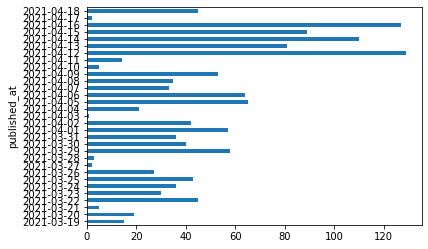

In [77]:
# Постройте график опубликованных вакансий по датам
df.groupby('published_at')['id'].count().plot(kind='barh');

In [78]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
df['weekday'] = df.published_at.apply(lambda x: x.weekday())

In [80]:
df.groupby('weekday')['id'].count()

weekday
0    297
1    215
2    215
3    224
4    264
5     29
6     88
Name: id, dtype: int64

In [75]:
# Находим вакансии с использованием python, которые вам интересны
term1 = df.name.str.contains('Аналитик|аналитик')
term2 = df.description.str.contains('Python|python')
df[term1&term2].shape

(52, 5)

In [48]:
df[term1&term2]

,id,name,description,key_skills,published_at
33,43623094,Стажер Data Engineer (Аналитик),<p><strong>Центр портфельного управления ищет ...,,2021-04-05T17:31:15+0300
62,43769010,Аналитик по отчетности,<p>Формируем команду опытных профессионалов дл...,,2021-04-09T18:15:09+0300
116,43638516,Количественный аналитик Инвестиционного центра,<p><strong>Функции:</strong></p><ul><li>Расчет...,,2021-04-06T10:30:55+0300
174,42987197,Руководитель направления по аналитике данных,<p><strong>Описание вакансии:</strong></p> <p>...,,2021-04-14T09:06:33+0300
179,43507249,Руководитель проектов (дэшборд стратегии/анали...,<p><em>Мы ищем кандидата на позицию Руководите...,"Управление проектами,SQL,MS SQL,Python,Анализ ...",2021-03-31T17:11:09+0300
205,43818788,Бизнес аналитик Департамента инвестиционной де...,<p>Развитие IT Платформы Департамента инвестиц...,"Python,Корпоративные финансы,МСФО,Финансовый а...",2021-04-12T17:08:23+0300
224,43726226,Бизнес/продуктовый аналитик,<p><strong><em>О нас:</em></strong></p> <p>Sbe...,"SQL,Бизнес-анализ",2021-04-08T14:52:55+0300
232,43837863,Data аналитик,<p>Команда Блока Стратегии и развития Сбербанк...,"Olap (online analytical processing),PostgreSQL...",2021-04-13T11:33:44+0300
238,41159839,Руководитель группы медиа аналитики,"<p>Сбер ищет гуру эконометрики - менеджера, ко...","Python,Деловое общение,Подготовка презентаций,...",2021-04-05T11:40:59+0300
247,43319582,Аналитик направления клиентской лояльности и у...,<p><strong>Обязанности:</strong></p> <ul> <li>...,,2021-03-24T15:32:29+0300


In [51]:
#Определяем по полю skills какие навыки больше всего востребованы для, вакасий выше (Аналитик с Python)
skills = df[term1&term2].key_skills.tolist()
skills = [x for x in skills if x]
skills = ','.join(skills)
skills = skills.split(',')
from collections import Counter
c = Counter(skills)

In [53]:
#Выводим 10-ть самых наиболее необходимых skills, для вакансии Аналитик с Python
c.most_common(10)

[('Python', 16),
 ('SQL', 13),
 ('PostgreSQL', 5),
 ('Oracle Pl/SQL', 4),
 ('Анализ данных', 3),
 ('Системный анализ', 3),
 ('Java', 3),
 ('Управление проектами', 2),
 ('MS SQL', 2),
 ('ORACLE', 2)]

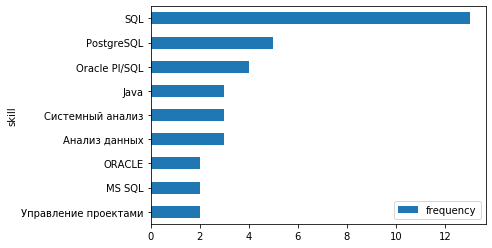

In [83]:
#Постройте график по skills (по 10-ти самых наиболее необходимых skills, кроме Python)
top_n = 10
common_skills =[x for x in c.most_common(top_n) if x[0] != 'Python']
skill_df = pd.DataFrame(common_skills, columns=['skill','frequency'])
skill_df = skill_df.sort_values(by='frequency')
skill_df.set_index('skill').plot(kind='barh');